<a href="https://colab.research.google.com/github/pushkarsingh-001/project-ai-ml/blob/main/fake_currency_model_P_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

print('Data source import complete.')


Data source import complete.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fake_currency_data.csv')

In [4]:
df.head()

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness
0,USA,$100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488
1,USA,$20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119
2,EU,€10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393
3,USA,€20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114
4,EU,€20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438


In [5]:
df.isnull().sum()

,0
Country,0
Denomination,0
Counterfeit,0
SerialNumber,0
SecurityFeatures,0
Weight,0
Length,0
Width,0
Thickness,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Country           1000000 non-null  object 
 1   Denomination      1000000 non-null  object 
 2   Counterfeit       1000000 non-null  int64  
 3   SerialNumber      1000000 non-null  int64  
 4   SecurityFeatures  1000000 non-null  object 
 5   Weight            1000000 non-null  float64
 6   Length            1000000 non-null  float64
 7   Width             1000000 non-null  float64
 8   Thickness         1000000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 68.7+ MB


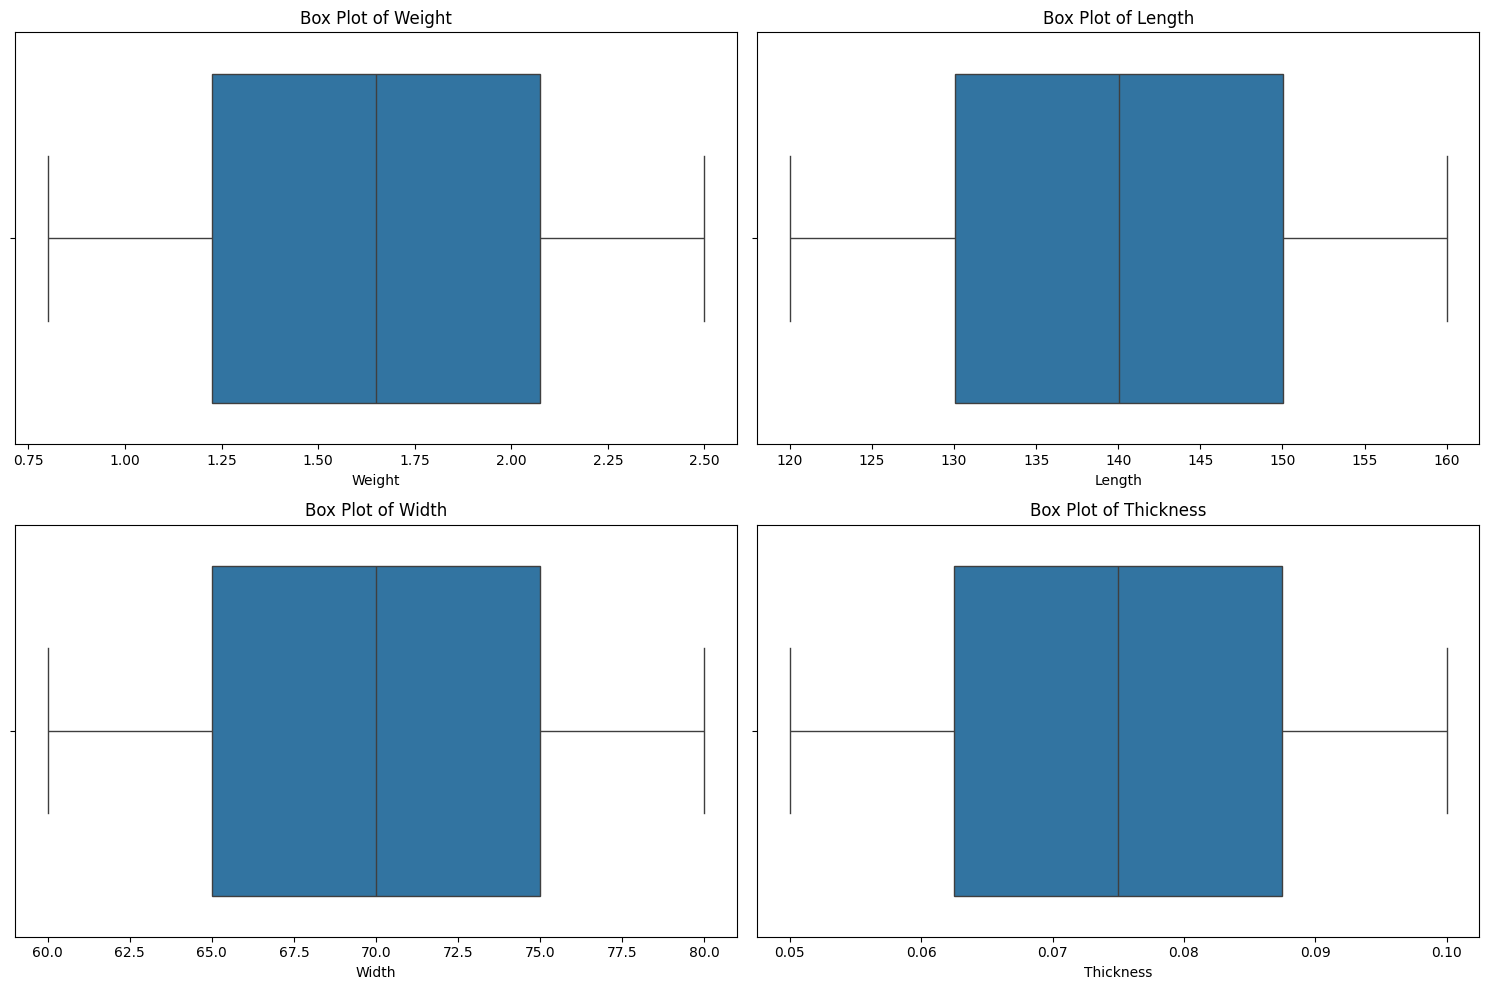

In [7]:
numerical_columns = [
    'Weight',
    'Length',
    'Width',
    'Thickness'
    ]
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

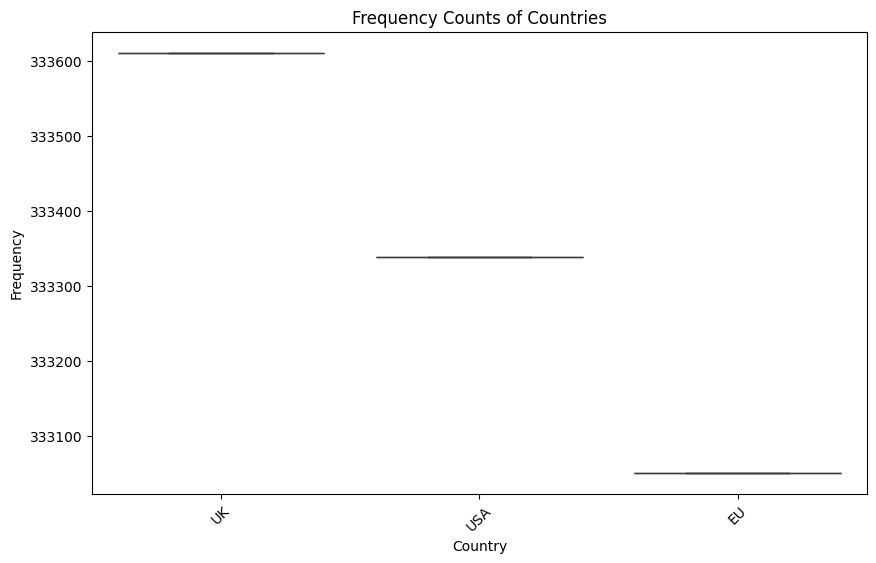

In [8]:
country_counts = df['Country'].value_counts()

# Visualize the frequency counts
plt.figure(figsize=(10, 6))
sns.boxplot(x=country_counts.index, y=country_counts.values)
plt.title('Frequency Counts of Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Country           1000000 non-null  object 
 1   Denomination      1000000 non-null  object 
 2   Counterfeit       1000000 non-null  int64  
 3   SerialNumber      1000000 non-null  int64  
 4   SecurityFeatures  1000000 non-null  object 
 5   Weight            1000000 non-null  float64
 6   Length            1000000 non-null  float64
 7   Width             1000000 non-null  float64
 8   Thickness         1000000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 68.7+ MB


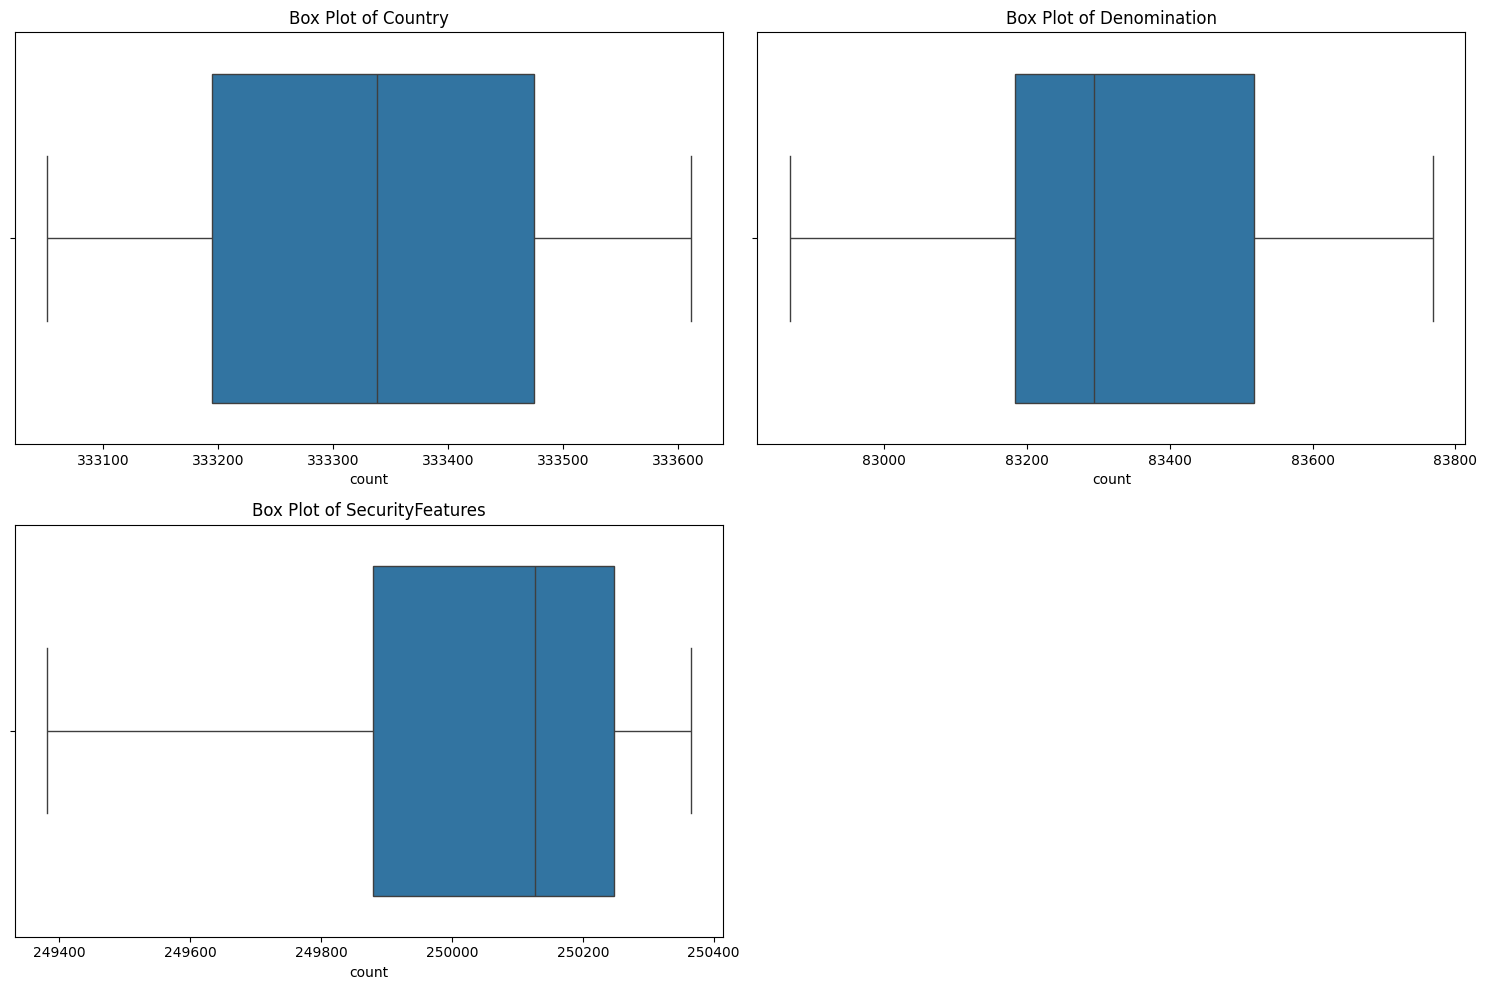

In [10]:
object_coilumns = [
    'Country',
    'Denomination',
    'SecurityFeatures'
]
plt.figure(figsize=(15, 10))
for i, column in enumerate(object_coilumns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column].value_counts())
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()
# country_counts = df['Country'].value_counts()

# plt.figure(figsize=(10, 6))
# sns.barplot(x=country_counts.index, y=country_counts.values)
# plt.title('Frequency Counts of Countries')
# plt.xlabel('Country')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.show()

In [11]:
df.head()

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness
0,USA,$100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488
1,USA,$20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119
2,EU,€10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393
3,USA,€20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114
4,EU,€20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438


In [12]:
numerical_features = ['Weight', 'Length', 'Width', 'Thickness', 'SerialNumber']
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

In [13]:
scaled_data.head()

,Weight,Length,Width,Thickness,SerialNumber
0,0.548093,0.256079,0.326900,0.969766,0.177479
1,0.118927,0.814910,0.806792,0.882381,0.954481
2,0.886302,0.821429,0.338622,0.227853,0.810421
3,0.333508,0.578342,0.918853,0.062284,0.151254
4,0.585926,0.241618,0.795805,0.028765,0.511392


In [14]:
df.drop(['Weight', 'Length', 'Width', 'Thickness', 'SerialNumber'], axis = 1, inplace = True)
df = pd.concat([df, scaled_data], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Country           1000000 non-null  object 
 1   Denomination      1000000 non-null  object 
 2   Counterfeit       1000000 non-null  int64  
 3   SecurityFeatures  1000000 non-null  object 
 4   Weight            1000000 non-null  float64
 5   Length            1000000 non-null  float64
 6   Width             1000000 non-null  float64
 7   Thickness         1000000 non-null  float64
 8   SerialNumber      1000000 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 68.7+ MB


In [16]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'Country' column
encoded_data = encoder.fit_transform(df[['Country']])

# Convert the encoded data to a DataFrame
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Country']))


In [17]:
df = pd.concat([df, df_encoded], axis=1)

In [18]:
df.drop('Country', axis=1, inplace=True)


In [19]:
df['Country_EU'] = df['Country_EU'].astype(int)
df['Country_UK'] = df['Country_UK'].astype(int)
df['Country_USA'] = df['Country_USA'].astype(int)
df.head()

,Denomination,Counterfeit,SecurityFeatures,Weight,Length,Width,Thickness,SerialNumber,Country_EU,Country_UK,Country_USA
0,$100,1,Hologram,0.548093,0.256079,0.326900,0.969766,0.177479,0,0,1
1,$20,1,Security Thread,0.118927,0.814910,0.806792,0.882381,0.954481,0,0,1
2,€10,0,Hologram,0.886302,0.821429,0.338622,0.227853,0.810421,1,0,0
3,€20,1,Microprint,0.333508,0.578342,0.918853,0.062284,0.151254,0,0,1
4,€20,1,Watermark,0.585926,0.241618,0.795805,0.028765,0.511392,1,0,0


In [20]:
df['Denomination'].value_counts()

,count
Denomination,
€5,83769
$100,83612
$50,83593
€20,83494
£10,83432
$1,83346
£20,83242
$10,83232
£5,83192


In [21]:
df['Currency'] = df['Denomination']

df_encoded = pd.get_dummies(df['Currency'], prefix='Currency')

print(df_encoded)

        Currency_$1  Currency_$10  Currency_$100  Currency_$20  Currency_$5  \
0             False         False           True         False        False   
1             False         False          False          True        False   
2             False         False          False         False        False   
3             False         False          False         False        False   
4             False         False          False         False        False   
...             ...           ...            ...           ...          ...   
999995        False         False           True         False        False   
999996        False         False          False         False        False   
999997        False         False          False         False         True   
999998        False         False          False         False        False   
999999        False         False          False         False        False   

        Currency_$50  Currency_£10  Currency_£20  C

In [22]:
df = pd.concat([df, df_encoded], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Denomination      1000000 non-null  object 
 1   Counterfeit       1000000 non-null  int64  
 2   SecurityFeatures  1000000 non-null  object 
 3   Weight            1000000 non-null  float64
 4   Length            1000000 non-null  float64
 5   Width             1000000 non-null  float64
 6   Thickness         1000000 non-null  float64
 7   SerialNumber      1000000 non-null  float64
 8   Country_EU        1000000 non-null  int64  
 9   Country_UK        1000000 non-null  int64  
 10  Country_USA       1000000 non-null  int64  
 11  Currency          1000000 non-null  object 
 12  Currency_$1       1000000 non-null  bool   
 13  Currency_$10      1000000 non-null  bool   
 14  Currency_$100     1000000 non-null  bool   
 15  Currency_$20      1000000 non-null  bool   
 16  C

In [24]:
df['Currency_$1'] = df['Currency_$1'].astype(int)
df['Currency_$10'] = df['Currency_$10'].astype(int)
df['Currency_$100'] = df['Currency_$100'].astype(int)
df['Currency_$20'] = df['Currency_$20'].astype(int)
df['Currency_$5'] = df['Currency_$5'].astype(int)
df['Currency_$50'] = df['Currency_$50'].astype(int)
df['Currency_£10'] = df['Currency_£10'].astype(int)
df['Currency_£20'] = df['Currency_£20'].astype(int)
df['Currency_£5'] = df['Currency_£5'].astype(int)
df['Currency_€10'] = df['Currency_€10'].astype(int)
df['Currency_€5'] = df['Currency_€5'].astype(int)
df['Currency_€20'] = df['Currency_€20'].astype(int)



df.head()

,Denomination,Counterfeit,SecurityFeatures,Weight,Length,Width,Thickness,SerialNumber,Country_EU,Country_UK,...,Currency_$100,Currency_$20,Currency_$5,Currency_$50,Currency_£10,Currency_£20,Currency_£5,Currency_€10,Currency_€20,Currency_€5
0,$100,1,Hologram,0.548093,0.256079,0.326900,0.969766,0.177479,0,0,...,1,0,0,0,0,0,0,0,0,0
1,$20,1,Security Thread,0.118927,0.814910,0.806792,0.882381,0.954481,0,0,...,0,1,0,0,0,0,0,0,0,0
2,€10,0,Hologram,0.886302,0.821429,0.338622,0.227853,0.810421,1,0,...,0,0,0,0,0,0,0,1,0,0
3,€20,1,Microprint,0.333508,0.578342,0.918853,0.062284,0.151254,0,0,...,0,0,0,0,0,0,0,0,1,0
4,€20,1,Watermark,0.585926,0.241618,0.795805,0.028765,0.511392,1,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
df.columns

Index(['Denomination', 'Counterfeit', 'SecurityFeatures', 'Weight', 'Length',
       'Width', 'Thickness', 'SerialNumber', 'Country_EU', 'Country_UK',
       'Country_USA', 'Currency', 'Currency_$1', 'Currency_$10',
       'Currency_$100', 'Currency_$20', 'Currency_$5', 'Currency_$50',
       'Currency_£10', 'Currency_£20', 'Currency_£5', 'Currency_€10',
       'Currency_€20', 'Currency_€5'],
      dtype='object')

In [26]:
df.drop('Currency', axis=1, inplace=True)

In [27]:
df['sf'] = df['SecurityFeatures']

df_encoded = pd.get_dummies(df['sf'], prefix='sf').astype(int)

print(df_encoded)

        sf_Hologram  sf_Microprint  sf_Security Thread  sf_Watermark
0                 1              0                   0             0
1                 0              0                   1             0
2                 1              0                   0             0
3                 0              1                   0             0
4                 0              0                   0             1
...             ...            ...                 ...           ...
999995            0              0                   0             1
999996            1              0                   0             0
999997            0              1                   0             0
999998            0              0                   0             1
999999            0              0                   0             1

[1000000 rows x 4 columns]


In [28]:
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Denomination,Counterfeit,SecurityFeatures,Weight,Length,Width,Thickness,SerialNumber,Country_EU,Country_UK,...,Currency_£20,Currency_£5,Currency_€10,Currency_€20,Currency_€5,sf,sf_Hologram,sf_Microprint,sf_Security Thread,sf_Watermark
0,$100,1,Hologram,0.548093,0.256079,0.326900,0.969766,0.177479,0,0,...,0,0,0,0,0,Hologram,1,0,0,0
1,$20,1,Security Thread,0.118927,0.814910,0.806792,0.882381,0.954481,0,0,...,0,0,0,0,0,Security Thread,0,0,1,0
2,€10,0,Hologram,0.886302,0.821429,0.338622,0.227853,0.810421,1,0,...,0,0,1,0,0,Hologram,1,0,0,0
3,€20,1,Microprint,0.333508,0.578342,0.918853,0.062284,0.151254,0,0,...,0,0,0,1,0,Microprint,0,1,0,0
4,€20,1,Watermark,0.585926,0.241618,0.795805,0.028765,0.511392,1,0,...,0,0,0,1,0,Watermark,0,0,0,1


In [29]:
df.drop('Denomination', axis=1, inplace=True)
df.drop('SecurityFeatures', axis=1, inplace=True)
df.drop('sf', axis=1, inplace=True)


In [30]:
df.head()

,Counterfeit,Weight,Length,Width,Thickness,SerialNumber,Country_EU,Country_UK,Country_USA,Currency_$1,...,Currency_£10,Currency_£20,Currency_£5,Currency_€10,Currency_€20,Currency_€5,sf_Hologram,sf_Microprint,sf_Security Thread,sf_Watermark
0,1,0.548093,0.256079,0.326900,0.969766,0.177479,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.118927,0.814910,0.806792,0.882381,0.954481,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.886302,0.821429,0.338622,0.227853,0.810421,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0.333508,0.578342,0.918853,0.062284,0.151254,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0.585926,0.241618,0.795805,0.028765,0.511392,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [31]:
df.columns

Index(['Counterfeit', 'Weight', 'Length', 'Width', 'Thickness', 'SerialNumber',
       'Country_EU', 'Country_UK', 'Country_USA', 'Currency_$1',
       'Currency_$10', 'Currency_$100', 'Currency_$20', 'Currency_$5',
       'Currency_$50', 'Currency_£10', 'Currency_£20', 'Currency_£5',
       'Currency_€10', 'Currency_€20', 'Currency_€5', 'sf_Hologram',
       'sf_Microprint', 'sf_Security Thread', 'sf_Watermark'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Counterfeit         1000000 non-null  int64  
 1   Weight              1000000 non-null  float64
 2   Length              1000000 non-null  float64
 3   Width               1000000 non-null  float64
 4   Thickness           1000000 non-null  float64
 5   SerialNumber        1000000 non-null  float64
 6   Country_EU          1000000 non-null  int64  
 7   Country_UK          1000000 non-null  int64  
 8   Country_USA         1000000 non-null  int64  
 9   Currency_$1         1000000 non-null  int64  
 10  Currency_$10        1000000 non-null  int64  
 11  Currency_$100       1000000 non-null  int64  
 12  Currency_$20        1000000 non-null  int64  
 13  Currency_$5         1000000 non-null  int64  
 14  Currency_$50        1000000 non-null  int64  
 15  Currency_£10    

In [33]:
real_eu = df.loc[df['Country_EU'] == 1]
fake_eu = df.loc[df['Country_EU'] == 0]
df_eu = pd.DataFrame({'Country_EU': ['Real Money', 'Fake Money'], 'Count': [len(real_eu), len(fake_eu)]})

real_uk = df.loc[df['Country_UK'] == 1]
fake_uk = df.loc[df['Country_UK'] == 0]
df_uk = pd.DataFrame({'Country_UK': ['Real Money', 'Fake Money'], 'Count': [len(real_uk), len(fake_uk)]})


real_usa = df.loc[df['Country_USA'] == 1]
fake_usa = df.loc[df['Country_USA'] == 0]
df_usa = pd.DataFrame({'Country_USA': ['Real Money', 'Fake Money'], 'Count': [len(real_usa), len(fake_usa)]})



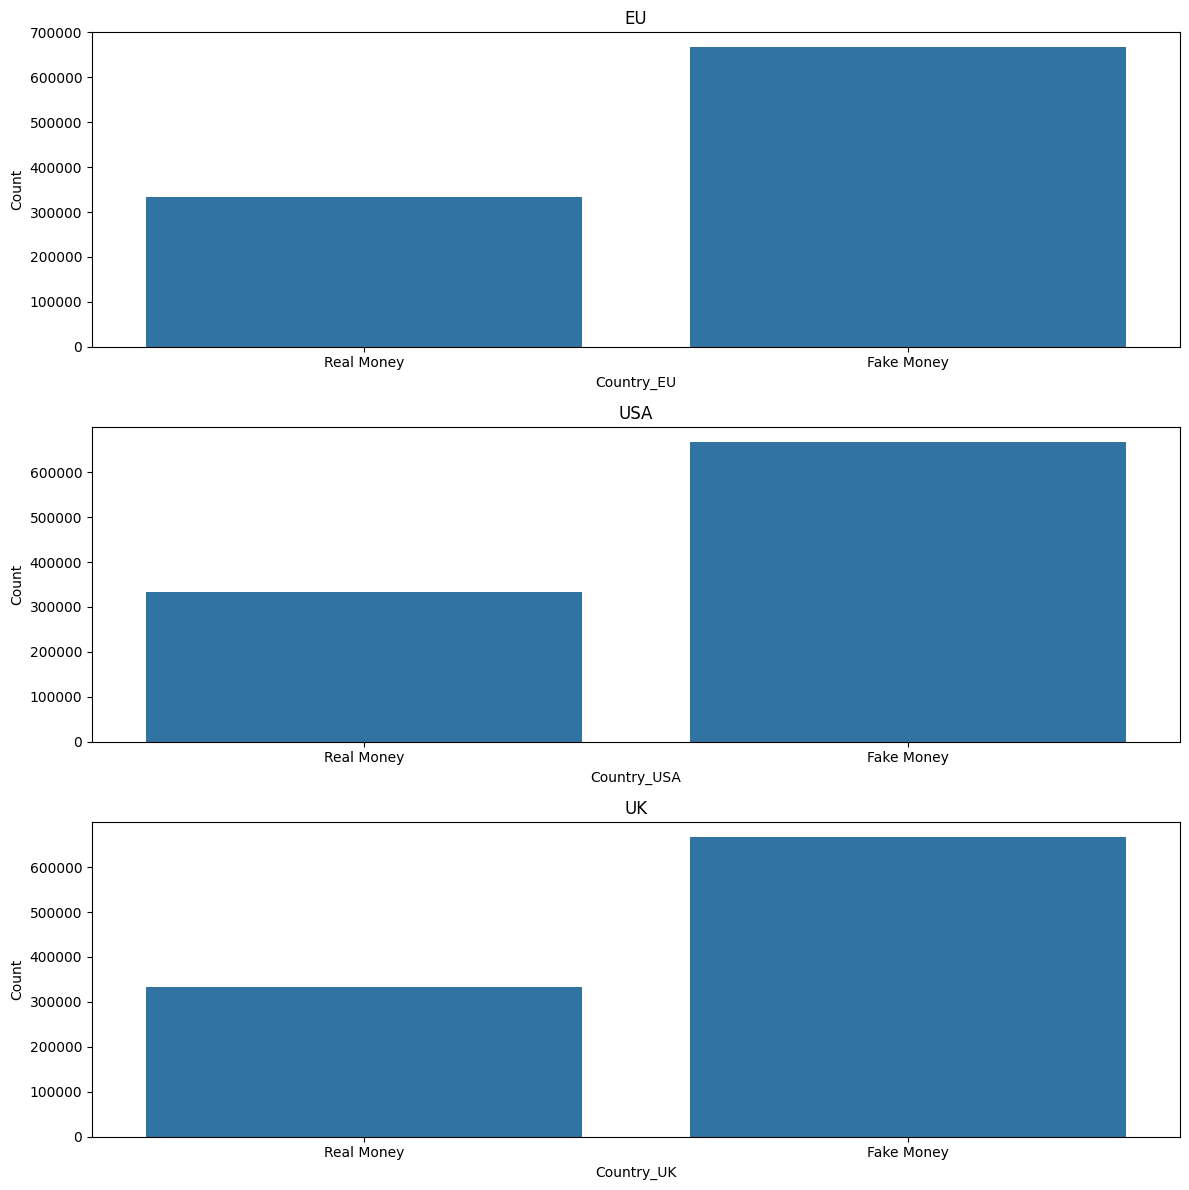

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))  # Adjust figsize for better visualization

# Create subplots for EU, USA, and UK (assuming separate DataFrames for each country)
eu_plot = sns.barplot(ax=axes[0], x = "Country_EU", y = "Count", data = df_eu)
usa_plot = sns.barplot(ax=axes[1], x = "Country_USA", y = "Count", data = df_usa)  # Replace with your USA DataFrame
uk_plot = sns.barplot(ax=axes[2], x = "Country_UK", y = "Count", data = df_uk)  # Replace with your UK DataFrame

# Rotate x-axis labels for better readability
# eu_plot.set_xticks(rotation=45)
# usa_plot.set_xticks(rotation=45)
# uk_plot.set_xticks(rotation=45)

# Add titles to each subplot

axes[0].set_title('EU')
axes[1].set_title('USA')
axes[2].set_title('UK')

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
df.head()

,Counterfeit,Weight,Length,Width,Thickness,SerialNumber,Country_EU,Country_UK,Country_USA,Currency_$1,...,Currency_£10,Currency_£20,Currency_£5,Currency_€10,Currency_€20,Currency_€5,sf_Hologram,sf_Microprint,sf_Security Thread,sf_Watermark
0,1,0.548093,0.256079,0.326900,0.969766,0.177479,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.118927,0.814910,0.806792,0.882381,0.954481,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.886302,0.821429,0.338622,0.227853,0.810421,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0.333508,0.578342,0.918853,0.062284,0.151254,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0.585926,0.241618,0.795805,0.028765,0.511392,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
df.drop(['SerialNumber', 'Length', 'Width', 'Thickness', 'Weight'], axis = 1, inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype
---  ------              --------------    -----
 0   Counterfeit         1000000 non-null  int64
 1   Country_EU          1000000 non-null  int64
 2   Country_UK          1000000 non-null  int64
 3   Country_USA         1000000 non-null  int64
 4   Currency_$1         1000000 non-null  int64
 5   Currency_$10        1000000 non-null  int64
 6   Currency_$100       1000000 non-null  int64
 7   Currency_$20        1000000 non-null  int64
 8   Currency_$5         1000000 non-null  int64
 9   Currency_$50        1000000 non-null  int64
 10  Currency_£10        1000000 non-null  int64
 11  Currency_£20        1000000 non-null  int64
 12  Currency_£5         1000000 non-null  int64
 13  Currency_€10        1000000 non-null  int64
 14  Currency_€20        1000000 non-null  int64
 15  Currency_€5         1000000 non-null  int64
 16  s

In [38]:
df['Counterfeit'].value_counts()

,count
Counterfeit,
0,500609
1,499391


In [39]:
df.head()

,Counterfeit,Country_EU,Country_UK,Country_USA,Currency_$1,Currency_$10,Currency_$100,Currency_$20,Currency_$5,Currency_$50,Currency_£10,Currency_£20,Currency_£5,Currency_€10,Currency_€20,Currency_€5,sf_Hologram,sf_Microprint,sf_Security Thread,sf_Watermark
0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [40]:
X = df.drop('Counterfeit', axis=1)

y = df['Counterfeit']

print(X)
print(y)

        Country_EU  Country_UK  Country_USA  Currency_$1  Currency_$10  \
0                0           0            1            0             0   
1                0           0            1            0             0   
2                1           0            0            0             0   
3                0           0            1            0             0   
4                1           0            0            0             0   
...            ...         ...          ...          ...           ...   
999995           1           0            0            0             0   
999996           1           0            0            0             0   
999997           0           0            1            0             0   
999998           1           0            0            0             0   
999999           1           0            0            0             0   

        Currency_$100  Currency_$20  Currency_$5  Currency_$50  Currency_£10  \
0                   1          

In [41]:
y

,Counterfeit
0,1
1,1
2,0
3,1
4,1
...,...
999995,1
999996,1
999997,0
999998,0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Country_EU,Country_UK,Country_USA,Currency_$1,Currency_$10,Currency_$100,Currency_$20,Currency_$5,Currency_$50,Currency_£10,Currency_£20,Currency_£5,Currency_€10,Currency_€20,Currency_€5,sf_Hologram,sf_Microprint,sf_Security Thread,sf_Watermark
566853,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
382311,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
241519,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
719220,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
905718,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score



model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("Accuracy:", accuracy)

Precision: 0.4992
Recall: 0.3674
Accuracy: 0.50046


In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.501405


In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=75, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.50099


In [46]:
counterfeit_counts = df['Counterfeit'].value_counts()
print(counterfeit_counts)

is_imbalanced = counterfeit_counts[0] != counterfeit_counts[1]
print(f"Is the target variable imbalanced? {is_imbalanced}")

if is_imbalanced:
    print("The target variable is imbalanced. Consider applying oversampling or undersampling techniques to balance the training data.")
else:
    print("The target variable is balanced.")

Counterfeit
0    500609
1    499391
Name: count, dtype: int64
Is the target variable imbalanced? True
The target variable is imbalanced. Consider applying oversampling or undersampling techniques to balance the training data.
